In [ ]:
#Import pandas library
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Define dataframe based on csv data (on BigFoot sightings)
bigfoot_geo_df = pd.read_csv("bfro_reports_geocoded.csv")

In [ ]:
#Create new dataframe copy and remove columns with large gaps in data
bigfoot_clean_df = bigfoot_geo_df.copy()
bigfoot_clean_df = bigfoot_clean_df.drop(columns=["uv_index","precip_type"])


In [ ]:
#Drop rows with null data and provide a data count
bigfoot_clean_df = bigfoot_clean_df.dropna(how="any")

In [ ]:
#Output clean data to csv file
bigfoot_clean_df.to_csv("Bigfoot Clean Data.csv")
bigfoot_clean_df.head()

#############################################################################################################################
# Mercedes' questions start in the cell below
##############################################################################################################################

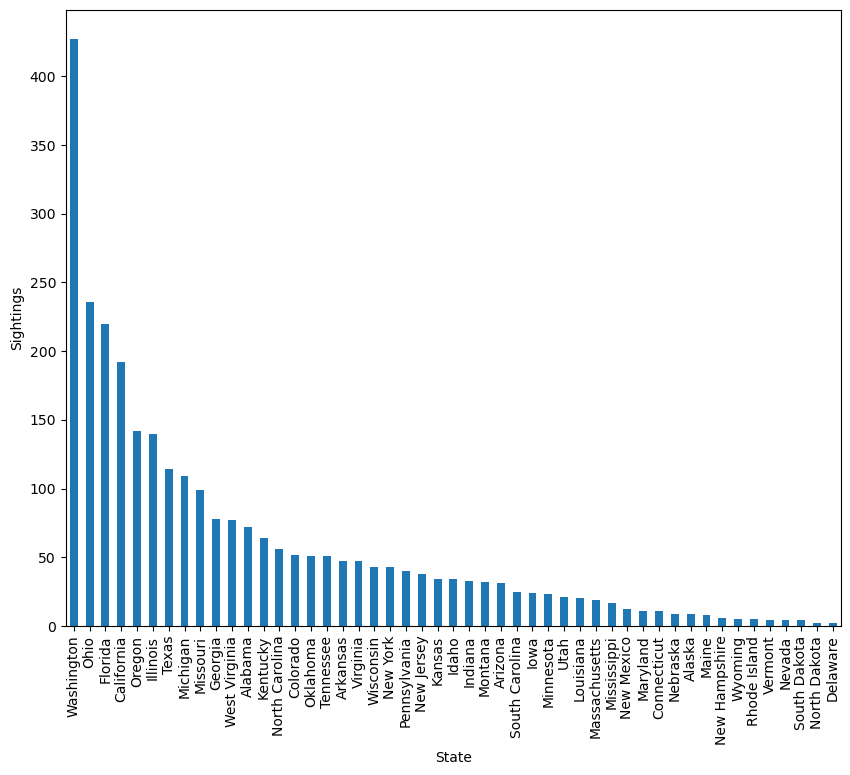

In [108]:
#Analyzing BigFoot sightings by state

#What is the recurrence of sightings by state/location? 
state_group=bigfoot_clean_df.groupby("state")
sightings_by_state=bigfoot_clean_df["state"].value_counts()


#Bar graph
#Create the chart
state_bar_chart=sightings_by_state.plot(kind='bar',figsize=(10,8))
state_bar_chart.set_xlabel("State")
state_bar_chart.set_ylabel("Sightings")

#save as png
plt.savefig("../timothyrenner-bfro-sightings-data/state_count.png")
plt.show()

In [ ]:
width=0.2

for boolean,sightings_by_state in sightings_by_state.items():
    p=ax.bar(state_group, sightings_by_state, width,label=boolean)
    bottom+=weight_count
ax.set_title("State")
ax.legend(loc="upper right")

plt.show()

In [ ]:
#What state had the least occurrences? 
least_states_sightings=bigfoot_clean_df["state"].min()
least_states_sightings



In [ ]:
#What state had the most occurrences? 
most_states_sightings=bigfoot_clean_df["state"].max()
most_states_sightings



In [ ]:
#Where does BigFoot like to spend the Christmas holidays?


In [80]:
#Heatmap

#Save state sightings count as a new df
state_df=pd.DataFrame(data=sightings_by_state)
state_df=state_df.rename(columns={"state":"sighting_counts"})
state_df['state']=state_df.index
state_df.reset_index(drop=True)
state_df.head()


,count,state
Washington,427,Washington
Ohio,236,Ohio
Florida,220,Florida
California,192,California
Oregon,142,Oregon


In [85]:


#Read shp file containing the geometry
us_map=gpd.read_file("cb_2018_us_state_500k.shp")


#rename state column so it matches the bigfoot df
map_df=us_map.rename(columns={"NAME":"state"})
map_df.head()

#Prep data for plotting
map_and_stats=map_df.merge(state_df,on="state")
map_and_stats


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,state,LSAD,ALAND,AWATER,geometry,count
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",17
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",51
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",47
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",77
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",20
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",109
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",19
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",34
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",220


C:\Users\msifo\AppData\Local\Temp\ipykernel_15044\94268913.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info,fraction=0.03, pad=0.04)


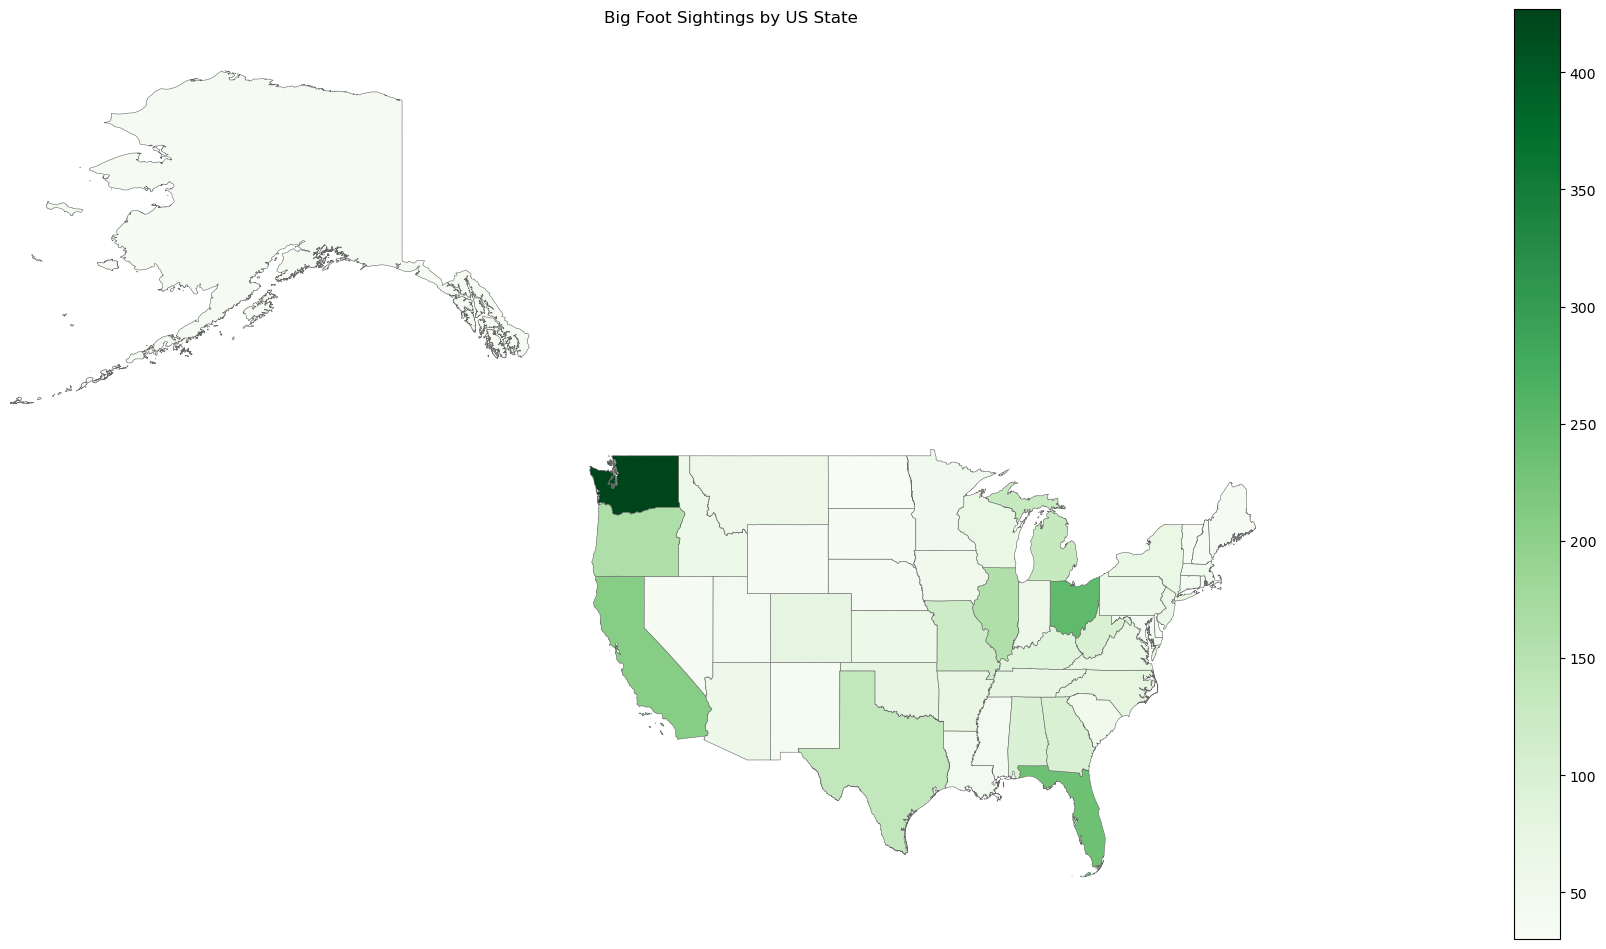

In [109]:
#Formatting
fig, ax = plt.subplots(1, figsize=(20,20))
plt.xticks(rotation=90)
plt.xlim(-175,-50)
plt.axis('off')
plt.title("Big Foot Sightings by US State")

#Add color scale bar
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=30, vmax=427))
bar_info._A = []
cbar = fig.colorbar(bar_info,fraction=0.03, pad=0.04)

#Draw data from the joined df
map_and_stats.plot(column="count", cmap="Greens", linewidth=0.4, ax=ax, edgecolor=".4")

#save as png
plt.savefig("../timothyrenner-bfro-sightings-data/heat_map.png")